# 도전과제 : 1D-CNN, LSTM, GRU 등

In [54]:
#Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from tensorflow import keras

Raisin dataset(건포도 데이터세트)
Kecimen과 Besni 품종(각 450개)과, 7개의 형태학적 특징이 추출됨.

1.) Area: 건포도 경계 내의 픽셀 수를 제공. 
2.) Perimeter: 건포도의 경계와 주변 픽셀 사이의 거리를 계산해 환경을 측정.
3.) MajorAxisLength: 건포도에 그릴 수 있는 가장 긴 선인 주축의 길이를 제공.
4.) MinorAxisLength: 건포도에 그릴 수 있는 가장 짧은 선인 작은 축의 길이를 제공.
5.) Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins. 
6.) ConvexArea: 건포도로 형성된 영역의 가장 작은 볼록 껍질의 픽셀 수를 제공.
7.) Extent: 경계 상자의 총 픽셀에 대한 건포도에 의해 형성된 영역의 비율을 제공.
8.) Class: Kecimen과 Besni 건포도(품종).

In [40]:
#Data loader
file_path = '../Dataset/Raisin/Raisin_Dataset.xlsx'
sheet_name = 'Raisin_Grains_Dataset'
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [41]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [42]:
type(data)

pandas.core.frame.DataFrame

In [43]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [44]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [46]:
label = LabelEncoder()
data['Class'] = label.fit_transform(data['Class'])
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [19]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [58]:
X = data.iloc[:,0:7].values
y = data.iloc[:, 7].values

In [59]:
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y).values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=0)

In [60]:
X

array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, 8.19738392e-01,
        9.05460000e+04, 7.58650579e-01],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, 8.01805234e-01,
        7.87890000e+04, 6.84129570e-01],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, 7.98353619e-01,
        9.37170000e+04, 6.37612812e-01],
       ...,
       [9.96570000e+04, 4.31706981e+02, 2.98837323e+02, 7.21684066e-01,
        1.06264000e+05, 7.41098519e-01],
       [9.35230000e+04, 4.76344094e+02, 2.54176054e+02, 8.45738510e-01,
        9.76530000e+04, 6.58798253e-01],
       [8.56090000e+04, 5.12081774e+02, 2.15271976e+02, 9.07345395e-01,
        8.91970000e+04, 6.32019963e-01]])

In [61]:
X.shape

(900, 6)

In [62]:
Y

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])

In [63]:
y.shape

(900,)

In [64]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# DENSE

In [65]:
model = Sequential()

model.add(Dense(6,input_shape=(6,),activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 6)                 42        
                                                                 
 dense_16 (Dense)            (None, 6)                 42        
                                                                 
 dense_17 (Dense)            (None, 6)                 42        
                                                                 
 dense_18 (Dense)            (None, 2)                 14        
                                                                 
Total params: 140 (560.00 Byte)
Trainable params: 140 (560.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:

model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\nkm11\anaconda3\envs\dr\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\nkm11\anaconda3\envs\dr\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\nkm11\anaconda3\envs\dr\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\nkm11\anaconda3\envs\dr\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\nkm11\anaconda3\envs\dr\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\nkm11\anaconda3\envs\dr\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\nkm11\anaconda3\envs\dr\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\nkm11\anaconda3\envs\dr\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\nkm11\anaconda3\envs\dr\Lib\site-packages\keras\src\losses.py", line 2432, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\nkm11\anaconda3\envs\dr\Lib\site-packages\keras\src\backend.py", line 5809, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


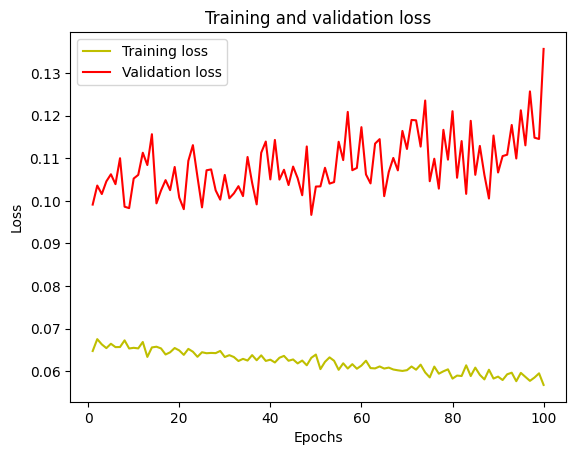

In [30]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()